# SVM Demo

The support vector machine (SVM) is an example of a convex optimization problem w/ quadratic criteria. SVM is a technique for classifying data that may not be linearly separable. This is accomplished by performing a linear classification problem in a higher dimensional feature space where the data is linearly separable. 

In order to demonstrate how an SVM works, we walk through an example using `sklearn`. We then cast the SVM as a problem that can be solved via convex optimization. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns; sns.set()

from sklearn.datasets.samples_generator import make_blobs


In [2]:
# utility functions
def plot_svc_decision_function(clf, ax=None):
    """
    Plot the decision function for a 2D SVM
    """
    if ax is None:
        ax = plt.gca()
        
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    
    # plot the margins
    ax.contour(X, Y, P, colors='k', 
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])


## Example SVM Problem

First, let's assume we have $N$ tuples, $(x_i, y_i)$, where $x_i \in R^m$ represent feature vectors, and $y_i$ represents the true class, $y_i \in \{-1, 1\}$. For instance, in the figure below, the blue dots correspond to $x_i$ from $y_i = -1$, and the red dots correspond to features from $y_i = 1$. Let's also we've already done some kind of projection into a space where the classes are linearly separable. 

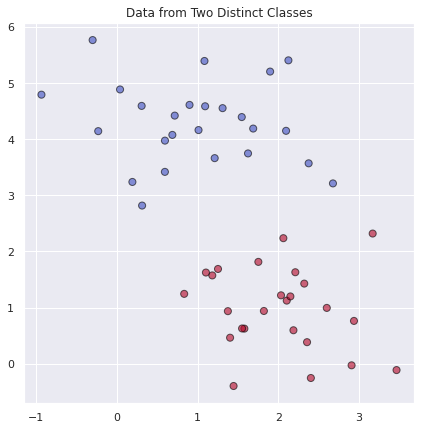

In [3]:
X1, X2 = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=.75)
plt.scatter(X1[:, 0], X1[:, 1], c=X2, s=50, edgecolors='black', cmap=plt.cm.coolwarm, alpha=0.6)
plt.title("Data from Two Distinct Classes")
plt.gcf().set_size_inches((7, 7))    
plt.show()

Now, we only have access to each value of $x_i$, the class they belong to, the corresponding $y_i$, is unknown. 
Let's define a hyperplane by: 

$\{ x: f(x) = x^T\beta + 1 = 0 \}$

A classification rule induced by this hyperplane $f(x)$ is:

$ G(x) = sign[x^T\beta +1 ]$

Since we are in a space where the classes are linearly separable, we can find a function $f(x) = x^T\beta + 1 $ with $y_if(x_i) > 0 \forall i$. Hence, we are able to find a hyperplane that creates the largest margin between the two classes. This is what the SVM accomplishes.

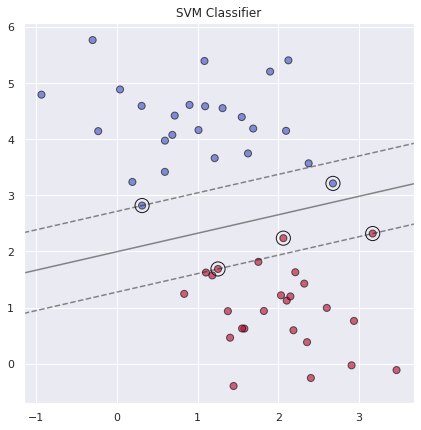

In [4]:
from sklearn.svm import SVC

# create svm using a linear kernel
clf = SVC(kernel='linear')

# train the classifier
clf.fit(X1, X2)

plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], c=X2, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none')
plot_svc_decision_function(clf)
plt.title("SVM Classifier")
plt.gcf().set_size_inches((7, 7))    
plt.show()

The circled points on the dotted lines are the so-called support vectors. The points between the dashed line and the decision boundary are within the margin. The SVM seeks to find the hyperplane that creates the largest margin, subject to the constraint to minimize the total distance of points on the wrong side of the margin.

## SVM as a Quadratic Program

We can solve classification problems more efficiently by re-writing the problem as one from convex optimization. Traditionally, the SVM is captured by the following:

$ \underset{\beta}{\operatorname{max}} M $

subject to $y_i(x_i^T\beta + 1) \geq M, i=1, \dots N$ 

Where, $M$ denotes the width of the margin. We can re-write this has

$ \underset{\beta}{\operatorname{min}} \lVert \beta \rVert$

subject to:

$y_i(x_i^T\beta + 1) \geq 1, i=1, \dots N$, where $M = 1/\lVert \beta \rVert $. 

Suppose that the classes overlap in feature space, ie the two classes aren't perfectly linearly separable. Then, we can modify our constraint to still maximize $M$, but allow for points to be on the wrong side of the margin. These points are called slack variables (these are the circle points that aren't on the dotted lines). So, we need to modify our constraint to:

$y_i(x_i^T\beta + 1) \geq M(1-\xi_i), i=1, \dots N$, where $\xi_i$ are slack variables.

This allows us to re-write our problem as: 

$ \underset{\beta}{\operatorname{min}} \lVert \beta \rVert$

subject to: 

$y_i(x_i^T\beta + 1) \geq 1 - \xi_1 \forall i$ 

and 

$\xi_i > 0, \sum \xi_i \leq C$, where $C$ is some constant. 

Finally, we can re-formulate our problem as a computationally efficient quadratic program in matricial form as:

$argmin \; \lVert \beta \rVert^2  + C1^T\xi$ 

subject to: 

$ \xi \geq diag(y)X\beta + 1$

and 

$\xi > 0$
Where $diag(y)$ denotes a diagonal matrix with the elements of $y$ on its diagonal.